<a href="https://colab.research.google.com/github/Geoffrey-Chege/GEOFFREY_CHEGE_MWANGI_MORINGA_CORE_IPW6/blob/main/GEOFFREY_CHEGE_MWANGI_MORINGA_CORE_IPW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A Python Project: Predicting the Results of a Football Game.

## 1 Introduction
 * Football is a family of team sports that involve, to varying degrees, kicking a ball to score a goal.

 * The men's FIFA World Ranking is a ranking system for men's national teams in association football.    
 * Currently led by Belgium
 
 * A points system is used, with points being awarded based on the results of all FIFA-recognised full international matches.
 
 

### 1.1 Defining the Question

* I am a football analyst hired by the company Mchezopesa Ltd. to predict the result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly.

### 1.2 Metrics for Success
 * Create an optimal and reliable prediction Model with 80% accuracy score and above.
 * The model should have the least RMSE score achievable
    

### 1.3 The Context

The men's FIFA World Ranking is a ranking system for men's national teams in association football, currently led by Belgium.The teams of the men's member nations of FIFA, football's world governing body, are ranked based on their game results with the most successful teams being ranked highest. The rankings were introduced in December 1992, and eight teams (Argentina, Belgium, Brazil, France, Germany, Italy, the Netherlands and Spain) have held the top position, of which Brazil have spent the longest ranked first.

A points system is used, with points being awarded based on the results of all FIFA-recognised full international matches. The ranking system has been revamped on several occasions, generally responding to criticism that the preceding calculation method did not effectively reflect the relative strengths of the national teams. Since 16 August 2018, the current version of the ranking system has adopted the Elo rating system used in chess and Go.

The ranking is currently sponsored by Coca-Cola; as such, The FIFA/Coca-Cola World Ranking name is also used. Coca-Cola also sponsors its women's counterpart.

Source: https://en.wikipedia.org/wiki/FIFA_World_Rankings#Current_calculation_method

### 1.4 Experimental design taken

- Performing EDA
- Performing necessary feature engineering
- Checking multicollinearity
- Building a model
    - Approach 1: Polynomial regression model
        - Model 1: Predict how many goals the home team scores
        - Model 2: Predict how many goals the away team scores
    - Approach 2: Logistic regression model
         - Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)
- Cross-validating the model
- Computing RMSE
- Creating residual plots for the model
- Assessing Heteroscedasticity using Bartlett’s test
- Challenging the solution.

### 1.5 Appropriateness of the available Data

Two datasets are available:
* Ranking dataset: contains the team ranks from 1993 to 2018
* Results dataset: contains matches and the team scores since 1892 to 2019

The link to the dataset is:
* https://drive.google.com/open?id=1BYUqaEEnFtAe5lvzJh9lpVpR2MAvERUc

## 2 Importing python Libraries to be used in Analysis

In [22]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

     | 25.9 MB 149 kB/s
     |████████████████████████████████| 10.9 MB 8.3 MB/s 
     |████████████████████████████████| 596 kB 50.8 MB/s 
     |████████████████████████████████| 102 kB 7.4 MB/s 
     |████████████████████████████████| 675 kB 51.2 MB/s 
     |████████████████████████████████| 4.7 MB 37.4 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
     |████████████████████████████████| 812 kB 51.3 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.1.1-py2.py3-none-any.whl size=261287 sha256=8ef3036c46c22d6760c326a50aa296501fbff312df250495b1990bb161b98c5e
  Stored in directory: /tmp/pip-ephem-wheel-cache-es7srxsa/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=b1a27bdb6c95b337c6d7c7eb4c7cffe115fabde20046455154e2c77fd3db13ae
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d

In [1]:
!pip install pydataset
from pydataset import data 

In [3]:
# Importing python libraries used in analysis

import pandas as pd
import numpy as np
import scipy as sp
import pandas_profiling as pp
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score
from sklearn.metrics import mean_squared_error,  r2_score 
from sklearn.model_selection import KFold, LeaveOneOut
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

## 3 Previewing the Datasets

In [4]:
# Creating data frames and reading datasets

rank = pd.read_csv('fifa_ranking.csv')
result = pd.read_csv('results.csv')

In [5]:
# Previewing the top of rank dataset

rank.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [6]:
# Previweing the top of result dataset

result.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


## 4 Data Cleaning

### Missing Values

In [7]:
# Checking information on the rank data frame

rank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

In [8]:
# Checking for null values on the rank data frame

rank.isnull().sum()

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

In [9]:
# Checking information on the result data frame

result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


In [10]:
# Checking for null values on the result data frame

result.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

There are no missing values in either data frame.

### Checking column names

In [11]:
# Viewing the column names of the ranking dataset

rank.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')

In [12]:
# Viewing the column names of the result dataset

result.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

The column names in each data frame are appropriate.

### Dropping unnecessary columns

In [13]:
# Dropping unnecessary columns in rank dataset

rank.drop(['country_abrv', 'total_points', 'cur_year_avg', 'cur_year_avg_weighted' ,'last_year_avg' , 'last_year_avg_weighted' , 'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg' ,'three_year_ago_weighted', 'confederation'], axis =1, inplace = True)

In [14]:
# Every column in the result data frame is relevant to the research

In [15]:
# Checking our rank data frame

rank.head()

,rank,country_full,previous_points,rank_change,rank_date
0,1,Germany,57,0,1993-08-08
1,2,Italy,57,0,1993-08-08
2,3,Switzerland,50,9,1993-08-08
3,4,Sweden,55,0,1993-08-08
4,5,Argentina,51,5,1993-08-08


In [16]:
# checking our datasets

result.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


### Checking for anomalies

In [17]:
# Checking the number of unique values in each column of the rank data frame

for column in rank.columns:
  print(column)
  print(rank[column].nunique())
  print('***********************')

rank
209
***********************
country_full
216
***********************
previous_points
1557
***********************
rank_change
121
***********************
rank_date
286
***********************


In [18]:
# Checking the number of unique values in each column of the result data frame

for column in result.columns:
  print(column)
  print(result[column].nunique())
  print('***********************')

date
15115
***********************
home_team
309
***********************
away_team
306
***********************
home_score
26
***********************
away_score
22
***********************
tournament
109
***********************
city
1960
***********************
country
266
***********************
neutral
2
***********************


### Checking for outliers

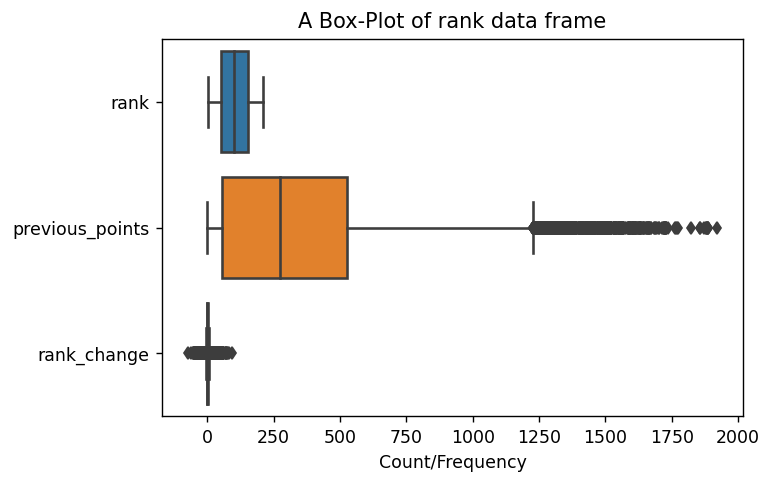

In [19]:
# Box-Plot of columns in rank data frame

plt.figure(dpi = 125)
ax = sns.boxplot(data = rank , orient="h")
plt.title('A Box-Plot of rank data frame', color = 'black')
plt.xlabel('Count/Frequency')
plt.show()

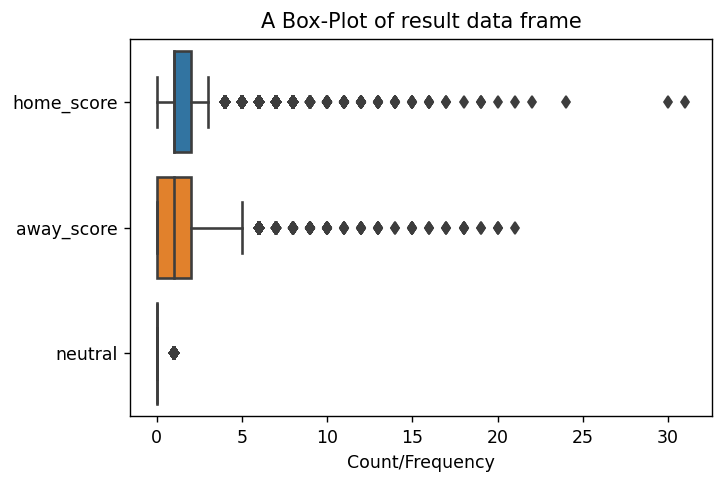

In [20]:
# Box-Plot of columns in result data frame

plt.figure(dpi = 125)
ax = sns.boxplot(data = result , orient="h")
plt.title('A Box-Plot of result data frame', color = 'black')
plt.xlabel('Count/Frequency')
plt.show()

## 5 Exploratory Data Analysis

In [21]:
# Viweing a summary report of the fifa ranking data frame

rank_report = pp.ProfileReport(rank)
rank_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [22]:
# Viweing a description of the rank data frame

rank.describe()

,rank,previous_points,rank_change
count,57793.000000,57793.000000,57793.000000
mean,101.628086,332.302926,-0.009897
std,58.618424,302.872948,5.804309
min,1.000000,0.000000,-72.000000
25%,51.000000,56.000000,-2.000000
50%,101.000000,272.000000,0.000000
75%,152.000000,525.000000,1.000000
max,209.000000,1920.000000,92.000000


In [23]:
# Viweing a summary report of the result data frame

result_report = pp.ProfileReport(result)
result_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [24]:
# Viweing a summary report of the result dataset

result.describe()

,home_score,away_score
count,40839.000000,40839.000000
mean,1.745709,1.188105
std,1.749145,1.405120
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


## 6 Feature Engineering

In [25]:
# Creating a copy of the rank data frame

rank2 = rank.copy()
rank2.head()

,rank,country_full,previous_points,rank_change,rank_date
0,1,Germany,57,0,1993-08-08
1,2,Italy,57,0,1993-08-08
2,3,Switzerland,50,9,1993-08-08
3,4,Sweden,55,0,1993-08-08
4,5,Argentina,51,5,1993-08-08


In [26]:
# Creating a copy of the result data frame

result2 = result.copy()
result2.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [27]:
# Creating a new column in the result2 data frame
# This column will contain the perfomance of the home team i.e. win, draw or loss

In [28]:
# The new column is goal_diff i.e. 
# difference in goals between the home and the away teams

result2['goal_diff'] = result2['home_score'] - result2['away_score']
result2.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,goal_diff
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,2
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,0
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,3


In [29]:
# Creating a function to specify whether its a win , loss or a draw based on a home team perspective
# Applying the function in a new column called Status_home


def home_team(home_goals):
    if home_goals > 0:
        return 'win'
    elif home_goals < 0:
        return 'loss'
    else:
        return 'draw'
      
result2['Status_home'] = result2.goal_diff.apply(lambda j: home_team(j))

In [30]:
# checking the home team perspective in the data frame

result2.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,goal_diff,Status_home
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,0,draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,2,win
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1,win
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,0,draw
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,3,win


In [31]:
# Creating a second function to specify whether its a win, loss or a draw based on a away team perspective
# Applying the function in a new column called Status_away


def away_team(away_goals):
    if away_goals < 0:
        return 'win'
    elif away_goals > 0:
        return 'loss'
    else:
        return 'draw'
      
result2['Status_Away'] = result2.goal_diff.apply(lambda w: away_team(w))

In [32]:
# Checking the away team perspective data frame

result2.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,goal_diff,Status_home,Status_Away
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,0,draw,draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,2,win,loss
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1,win,loss
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,0,draw,draw
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,3,win,loss


In [33]:
# Creating a third function to change the tournament type into three categories 
# World cup, Friendly, Other

def tournament(typ):
    if typ == 'Friendly':
        return 'Friendly'
    elif typ == 'FIFA World Cup':
        return 'World cup'
    else:
        return 'Other'
      
result2['tournament_type'] = result2.tournament.apply(lambda q: tournament(q))

In [34]:
# Viewing the data frame to the check changes

result2.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,goal_diff,Status_home,Status_Away,tournament_type
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,0,draw,draw,Friendly
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,2,win,loss,Friendly
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1,win,loss,Friendly
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,0,draw,draw,Friendly
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,3,win,loss,Friendly


In [35]:
# Checking the number of unique values in the tournament column

result2.tournament_type.unique()

array(['Friendly', 'Other', 'World cup'], dtype=object)

In [36]:
# Changing the dates column in both datasets into datetime format

result2['date'] = pd.to_datetime(result2['date'])
rank2['rank_date'] = pd.to_datetime(rank2['rank_date'])

In [37]:
# Confirming that we have changed the date columns into datetime datatypes

print(result2.dtypes)
print('\n')
print(rank2.dtypes)

date               datetime64[ns]
home_team                  object
away_team                  object
home_score                  int64
away_score                  int64
tournament                 object
city                       object
country                    object
neutral                      bool
goal_diff                   int64
Status_home                object
Status_Away                object
tournament_type            object
dtype: object


rank                        int64
country_full               object
previous_points             int64
rank_change                 int64
rank_date          datetime64[ns]
dtype: object


In [38]:
# Extracting the year and month from the date column; 
# Here we will create a new column for each


result2['year'] = pd.DatetimeIndex(result2['date']).year
result2['month'] = pd.DatetimeIndex(result2['date']).month



rank2['year'] = rank2['rank_date'].dt.year
rank2['month'] = rank2['rank_date'].dt.month


In [39]:
# confirming the changes

rank2.head()

,rank,country_full,previous_points,rank_change,rank_date,year,month
0,1,Germany,57,0,1993-08-08,1993,8
1,2,Italy,57,0,1993-08-08,1993,8
2,3,Switzerland,50,9,1993-08-08,1993,8
3,4,Sweden,55,0,1993-08-08,1993,8
4,5,Argentina,51,5,1993-08-08,1993,8


In [40]:
# confirming changes

result2.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,goal_diff,Status_home,Status_Away,tournament_type,year,month
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,0,draw,draw,Friendly,1872,11
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,2,win,loss,Friendly,1873,3
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1,win,loss,Friendly,1874,3
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,0,draw,draw,Friendly,1875,3
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,3,win,loss,Friendly,1876,3


In [41]:
# changing the full country column name in ranking dataset to home_team

rank2 = rank2.rename({'country_full': 'home_team'}, axis = 1)

In [42]:
# confirming changes

rank2.head()

,rank,home_team,previous_points,rank_change,rank_date,year,month
0,1,Germany,57,0,1993-08-08,1993,8
1,2,Italy,57,0,1993-08-08,1993,8
2,3,Switzerland,50,9,1993-08-08,1993,8
3,4,Sweden,55,0,1993-08-08,1993,8
4,5,Argentina,51,5,1993-08-08,1993,8


Moving forward, some columns will not be needed so we will drop them

In [43]:
# Dropping unnecessary columns in result2 dataset

result2.drop(['date', 'goal_diff'], axis = 1, inplace = True)

In [44]:
# Dropping unnecessary columns in rank2 dataset

rank2.drop(['rank_date'], axis =1, inplace = True)

In [45]:
# creating copies of the datasets
rank3 = rank2.copy()
result3 = result2.copy()

In [46]:
# confirming the rank3

rank3.head()

,rank,home_team,previous_points,rank_change,year,month
0,1,Germany,57,0,1993,8
1,2,Italy,57,0,1993,8
2,3,Switzerland,50,9,1993,8
3,4,Sweden,55,0,1993,8
4,5,Argentina,51,5,1993,8


In [47]:
# confirming the result3

result3.head()

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Status_home,Status_Away,tournament_type,year,month
0,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,draw,draw,Friendly,1872,11
1,England,Scotland,4,2,Friendly,London,England,False,win,loss,Friendly,1873,3
2,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,win,loss,Friendly,1874,3
3,England,Scotland,2,2,Friendly,London,England,False,draw,draw,Friendly,1875,3
4,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,win,loss,Friendly,1876,3


### Merging the Datasets

In [48]:
# MERGING THE DATASETS

# Based on home_team, year, month

home_merged = pd.merge(result2,rank2, how="left", on = ['home_team', 'year', 'month'])

In [49]:
# Viewing our merged dataset- first five observations

home_merged.head()

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Status_home,Status_Away,tournament_type,year,month,rank,previous_points,rank_change
0,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,draw,draw,Friendly,1872,11,NaN,NaN,NaN
1,England,Scotland,4,2,Friendly,London,England,False,win,loss,Friendly,1873,3,NaN,NaN,NaN
2,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,win,loss,Friendly,1874,3,NaN,NaN,NaN
3,England,Scotland,2,2,Friendly,London,England,False,draw,draw,Friendly,1875,3,NaN,NaN,NaN
4,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,win,loss,Friendly,1876,3,NaN,NaN,NaN


In [50]:
# Viewing our merged dataset- last five observations

home_merged.tail()

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Status_home,Status_Away,tournament_type,year,month,rank,previous_points,rank_change
40903,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True,win,loss,Other,2019,7,NaN,NaN,NaN
40904,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True,draw,draw,Other,2019,7,NaN,NaN,NaN
40905,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True,loss,win,Other,2019,7,NaN,NaN,NaN
40906,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True,loss,win,Other,2019,7,NaN,NaN,NaN
40907,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True,draw,draw,Other,2019,7,NaN,NaN,NaN


### Cleaning the merged data set

#### Checking merged column names

In [51]:
# renaming the rank column name to home_rank

home_merged = home_merged.rename({'rank': 'home_rank'}, axis = 1)

In [52]:
# Confirming changes

home_merged.head(2)

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Status_home,Status_Away,tournament_type,year,month,home_rank,previous_points,rank_change
0,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,draw,draw,Friendly,1872,11,NaN,NaN,NaN
1,England,Scotland,4,2,Friendly,London,England,False,win,loss,Friendly,1873,3,NaN,NaN,NaN


In [53]:
# For the second merge: 
# We need to rename the column home_team (originally called country full) as away team so that we get their individual ranks
# 

rank3 = rank3.rename({'home_team': 'away_team'}, axis = 1)
rank3.head(2)

,rank,away_team,previous_points,rank_change,year,month
0,1,Germany,57,0,1993,8
1,2,Italy,57,0,1993,8


In [54]:
# Merging the home_merged dataset with the 
# Based on away_team, year, month

home_merged2 = pd.merge(home_merged,rank3, how="left", on = ['away_team', 'year', 'month'])

In [55]:
# Checking the merged dataset

home_merged2.head()

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Status_home,Status_Away,tournament_type,year,month,home_rank,previous_points_x,rank_change_x,rank,previous_points_y,rank_change_y
0,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,draw,draw,Friendly,1872,11,NaN,NaN,NaN,NaN,NaN,NaN
1,England,Scotland,4,2,Friendly,London,England,False,win,loss,Friendly,1873,3,NaN,NaN,NaN,NaN,NaN,NaN
2,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,win,loss,Friendly,1874,3,NaN,NaN,NaN,NaN,NaN,NaN
3,England,Scotland,2,2,Friendly,London,England,False,draw,draw,Friendly,1875,3,NaN,NaN,NaN,NaN,NaN,NaN
4,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,win,loss,Friendly,1876,3,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
# renaming the rank column as away rank in the new dataframe

home_merged2 = home_merged2.rename({'rank': 'away_rank'}, axis = 1)
home_merged2.head()

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Status_home,Status_Away,tournament_type,year,month,home_rank,previous_points_x,rank_change_x,away_rank,previous_points_y,rank_change_y
0,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,draw,draw,Friendly,1872,11,NaN,NaN,NaN,NaN,NaN,NaN
1,England,Scotland,4,2,Friendly,London,England,False,win,loss,Friendly,1873,3,NaN,NaN,NaN,NaN,NaN,NaN
2,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,win,loss,Friendly,1874,3,NaN,NaN,NaN,NaN,NaN,NaN
3,England,Scotland,2,2,Friendly,London,England,False,draw,draw,Friendly,1875,3,NaN,NaN,NaN,NaN,NaN,NaN
4,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,win,loss,Friendly,1876,3,NaN,NaN,NaN,NaN,NaN,NaN


#### Missing values in merged columns

In [57]:
home_merged.isnull().sum()

home_team              0
away_team              0
home_score             0
away_score             0
tournament             0
city                   0
country                0
neutral                0
Status_home            0
Status_Away            0
tournament_type        0
year                   0
month                  0
home_rank          22299
previous_points    22299
rank_change        22299
dtype: int64

In [58]:
# In the merged dataset we have missing values because ranking began in 1993 we do not have the 2019 rankings 
# Therefore the data with no ranking will be dropped 
  
home_merged2.dropna(inplace = True)

In [59]:
# confirming that there are no null values

home_merged2.isnull().sum()

home_team            0
away_team            0
home_score           0
away_score           0
tournament           0
city                 0
country              0
neutral              0
Status_home          0
Status_Away          0
tournament_type      0
year                 0
month                0
home_rank            0
previous_points_x    0
rank_change_x        0
away_rank            0
previous_points_y    0
rank_change_y        0
dtype: int64

#### Checking for anomalies

In [60]:
# checking for duplicates

home_merged2.duplicated().sum()

62

In [61]:
# dropping the duplicates
home_merged2.drop_duplicates(inplace = True)


In [62]:
# Checking that we have no duplicates in the data
home_merged2.duplicated().sum()

0

#### Dropping columns unnecessary in building a model

In [63]:
# Dropping columns in the merged dataset that we will not need while building a model

home_merged2.drop(['country', 'city', 'home_team', 'away_team', 'tournament','previous_points_x','rank_change_x', 'previous_points_y', 'rank_change_y'], axis = 1, inplace = True)

In [64]:
# confirming changes

home_merged2.columns

Index(['home_score', 'away_score', 'neutral', 'Status_home', 'Status_Away',
       'tournament_type', 'year', 'month', 'home_rank', 'away_rank'],
      dtype='object')

In [65]:
# viewing our dataset after cleaning

home_merged2.head()

,home_score,away_score,neutral,Status_home,Status_Away,tournament_type,year,month,home_rank,away_rank
17910,0,0,False,draw,draw,Other,1993,8,19.0,67.0
17911,0,1,False,loss,win,Other,1993,8,70.0,5.0
17912,0,0,False,draw,draw,Other,1993,8,22.0,35.0
17913,1,5,False,loss,win,Other,1993,8,94.0,8.0
17914,0,0,True,draw,draw,Other,1993,8,58.0,25.0


In [66]:
#  checking the shape of the cleaned data

home_merged2.shape

(16895, 10)

In [67]:
# Encoding the categorical columns 
#

le = LabelEncoder()
home_merged_encoded = home_merged2.apply(le.fit_transform)

In [68]:
# Confirming the changes

home_merged_encoded.head()

,home_score,away_score,neutral,Status_home,Status_Away,tournament_type,year,month,home_rank,away_rank
17910,0,0,0,0,0,1,0,7,18,66
17911,0,1,0,1,2,1,0,7,69,4
17912,0,0,0,0,0,1,0,7,21,34
17913,1,5,0,1,2,1,0,7,93,7
17914,0,0,1,0,0,1,0,7,57,24


#### Checking for outliers

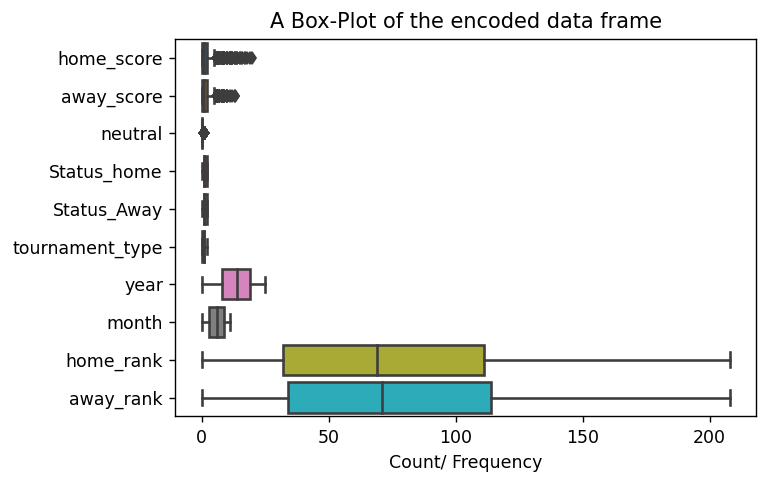

In [69]:
# checking for outliers in our dataset using boxplots

plt.figure(dpi = 125)
ax = sns.boxplot(data = home_merged_encoded , orient="h")
plt.title('A Box-Plot of the encoded data frame', color = 'black')
plt.xlabel('Count/ Frequency')
plt.show()

- The home and away score columns have many outliers.
- I will not remove them at this point to find out if they affect the model.



### Distribution of the Home & Away Scores


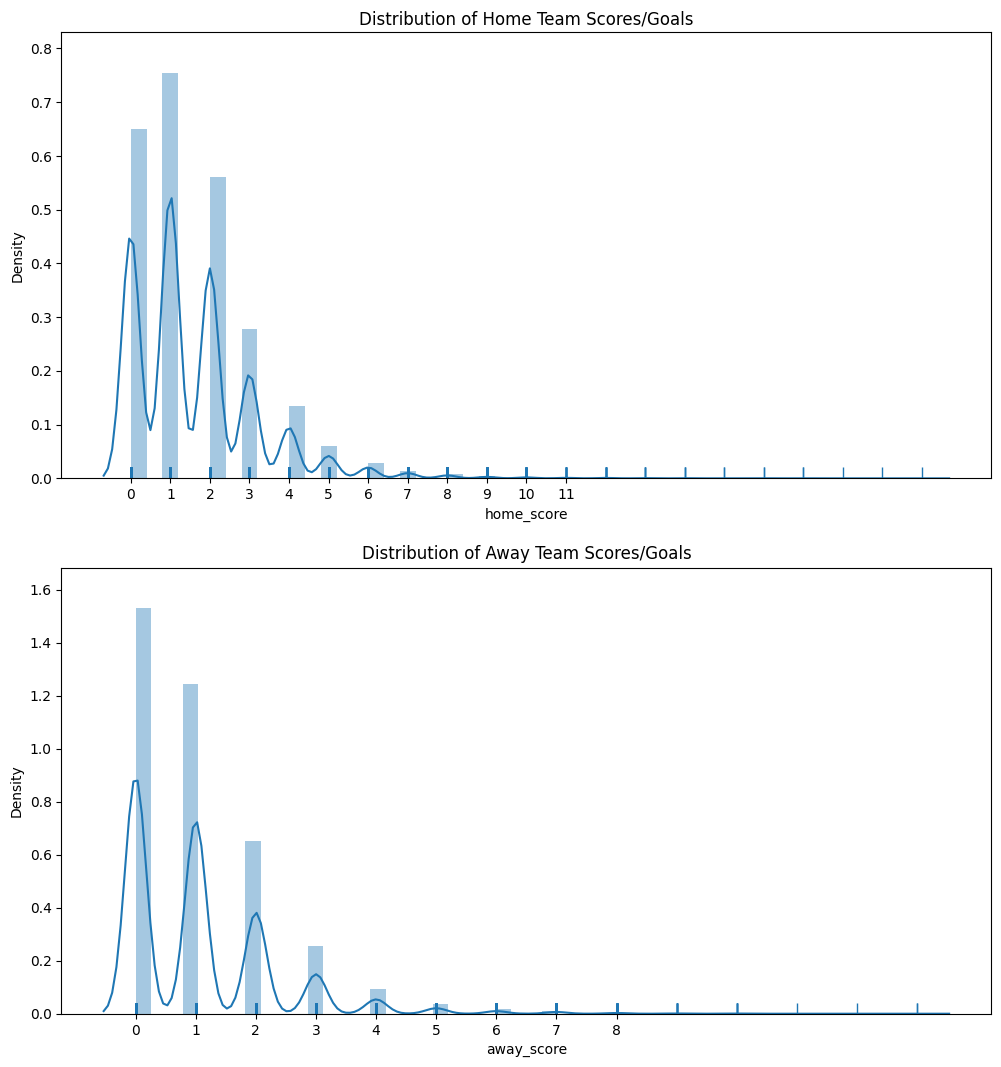

In [70]:
# Creating histograms to show the distribution of the goals for home teams and away teams
# Specifying the figure size
# Using seaborn for plotting
# Specifying the bins in the x axis
# Labeling title


plt.figure(figsize=(12,13), dpi = 100)
plt.subplot(211)
sns.distplot(home_merged_encoded["home_score"],rug=True)
plt.xticks(np.arange(0,12,1))
plt.title("Distribution of Home Team Scores/Goals",color='black')


plt.subplot(212)
sns.distplot(home_merged_encoded["away_score"],rug=True)
plt.xticks(np.arange(0,9,1))
plt.title("Distribution of Away Team Scores/Goals",color='black')
plt.show()

The histograms show that the home teams are highly likely to score at most one goal compared to the away team.

The charts also show that the goals scored in both home and away team is skewed to the right.

This means that there is a high probability of scoring more goals.

i.e. the outliers lie on the positive side.



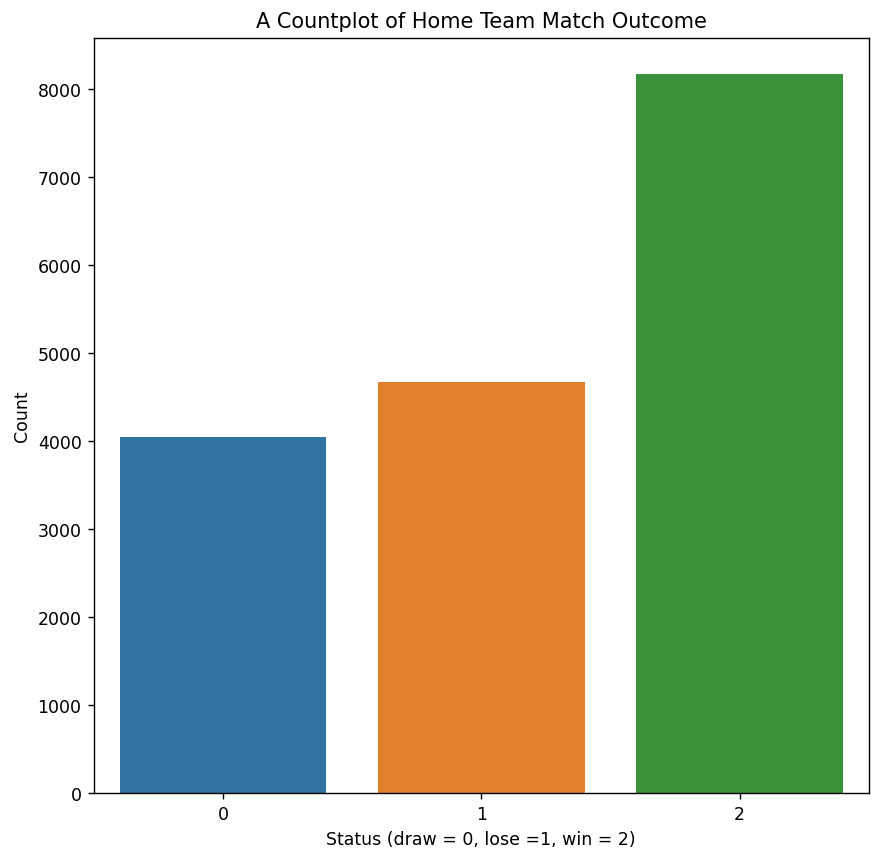

In [71]:
# The Home team Match outcome(draw = 0, lose =1, win = 2)
# Using a countplot to visualize these results
# Using Seaborn
# Labeling the x and y axis
# Giving a title to our chart
# Displaying our chart

plt.figure(figsize = (8,8), dpi = 125)
sns.countplot(home_merged_encoded['Status_home'])
plt.xlabel('Status (draw = 0, lose =1, win = 2)')
plt.ylabel('Count')
plt.title('A Countplot of Home Team Match Outcome', color = 'black')
plt.show()

The bar chart above shows that in most cases the home team wins the match.

The home team is less likely to lose or draw in match.



## 7 Multicollinearity

* Checking for multicollinearity
* Solving multicollinearity

In [72]:
# Before building a model, check if the independent variables are collinear/correlated to each other
# Getting the pearson correation coefficient for each of the variables

correlation = home_merged_encoded.corr()
correlation

,home_score,away_score,neutral,Status_home,Status_Away,tournament_type,year,month,home_rank,away_rank
home_score,1.000000,-0.164630,-0.042069,0.522603,-0.109024,0.050670,-0.038744,0.019612,-0.135755,0.320343
away_score,-0.164630,1.000000,0.100251,-0.241832,0.468678,0.034421,-0.008379,0.018170,0.221477,-0.180634
neutral,-0.042069,0.100251,1.000000,-0.045219,0.047965,0.126197,0.042915,-0.105011,0.037090,0.047561
Status_home,0.522603,-0.241832,-0.045219,1.000000,0.394717,0.045661,-0.018907,0.011666,-0.115259,0.214090
Status_Away,-0.109024,0.468678,0.047965,0.394717,1.000000,0.061724,0.004347,0.002941,0.133551,-0.088224
tournament_type,0.050670,0.034421,0.126197,0.045661,0.061724,1.000000,-0.020240,0.122963,0.069106,0.069350
year,-0.038744,-0.008379,0.042915,-0.018907,0.004347,-0.020240,1.000000,-0.002137,0.104167,0.105806
month,0.019612,0.018170,-0.105011,0.011666,0.002941,0.122963,-0.002137,1.000000,0.029475,0.030676
home_rank,-0.135755,0.221477,0.037090,-0.115259,0.133551,0.069106,0.104167,0.029475,1.000000,0.469742
away_rank,0.320343,-0.180634,0.047561,0.214090,-0.088224,0.069350,0.105806,0.030676,0.469742,1.000000


The correlation matrix indicates that most variables are moderately or weakly correlated.

This is very beneficial when creating a model, as collinear variables reduce the power of the model to identify independent 
variables that are statistically significant. 

We aim to create a model with the most significant variables.

We will use the correlation matrix to calculate the vif (Variance Inflation Factor).

The VIF will help in determining the variables that are collinear or highly correlated with each other.

In [73]:
# checking for multicollinearity
# Using the variance Inflation Factor (VIF)
# 
# This is calculated using linear algebra inverse function

pd.DataFrame(np.linalg.inv(correlation.values), index = correlation.index, columns = correlation.columns)

# From the correlation matrix below there are no correlated independent variables as all have VIF below 5, which is the threshold

,home_score,away_score,neutral,Status_home,Status_Away,tournament_type,year,month,home_rank,away_rank
home_score,1.967705,-0.662885,0.056782,-1.414937,0.988514,-0.068438,0.054304,0.007171,0.367640,-0.536562
away_score,-0.662885,2.041059,-0.115694,1.294157,-1.456402,0.016108,0.028131,-0.049020,-0.359890,0.347448
neutral,0.056782,-0.115694,1.053092,0.032235,-0.013146,-0.145710,-0.040337,0.130747,0.065400,-0.117595
Status_home,-1.414937,1.294157,0.032235,2.891898,-1.950728,0.014380,0.018112,-0.021938,0.208399,-0.205861
Status_Away,0.988514,-1.456402,-0.013146,-1.950728,2.604401,-0.072525,-0.020762,0.030166,-0.184987,0.161485
tournament_type,-0.068438,0.016108,-0.145710,0.014380,-0.072525,1.048637,0.033620,-0.140691,-0.057224,-0.022798
year,0.054304,0.028131,-0.040337,0.018112,-0.020762,0.033620,1.021470,-0.003228,-0.053571,-0.101251
month,0.007171,-0.049020,0.130747,-0.021938,0.030166,-0.140691,-0.003228,1.033008,-0.006571,-0.028516
home_rank,0.367640,-0.359890,0.065400,0.208399,-0.184987,-0.057224,-0.053571,-0.006571,1.664181,-1.018724
away_rank,-0.536562,0.347448,-0.117595,-0.205861,0.161485,-0.022798,-0.101251,-0.028516,-1.018724,1.790264


We check VIFs along the diagonal.

VIFs Values greater than 5 indicate that the presence of multicollinearity.

If present we remove the variable with the greatest VIF value.

From the correlation matrix there are no correlated independent variables as all have VIF values are below 5, which is the threshold.

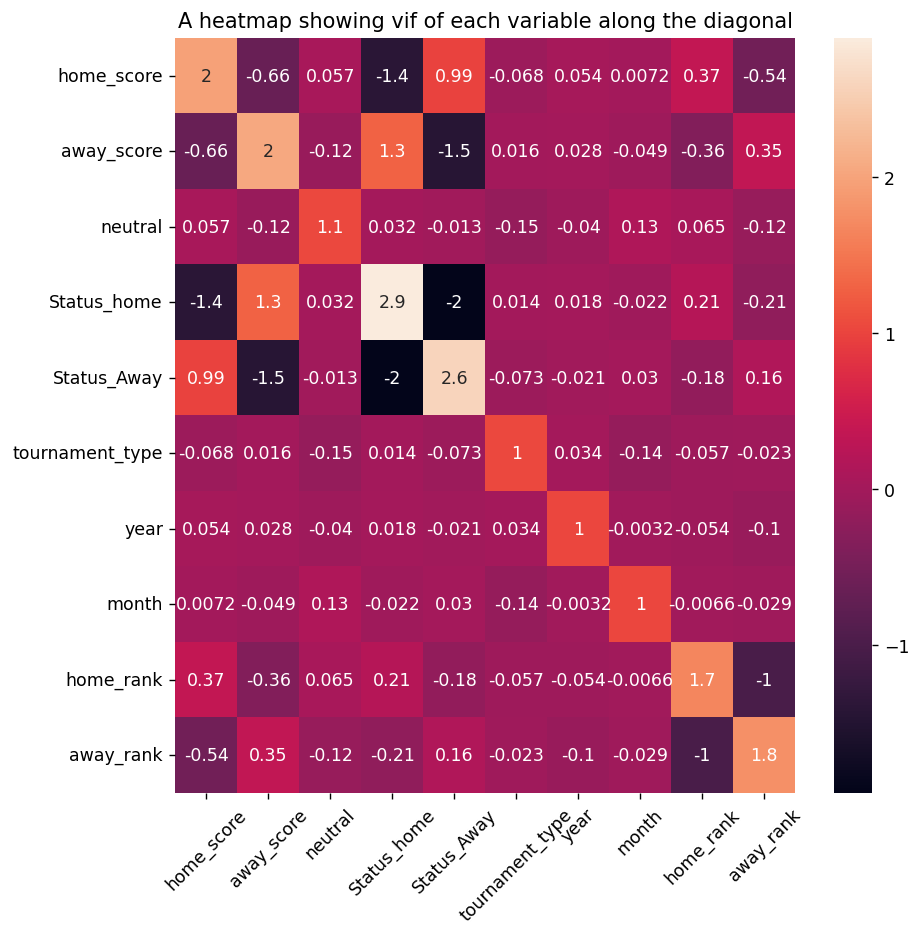

In [74]:
# Plotting a heat map to show the vif visually.
# Using the seaborn library for visualization
# Labeling the title
# Displaying the chart

vif = np.linalg.inv(correlation.values)
plt.figure(figsize = (8,8), dpi = 125)
sns.heatmap(vif, annot = True, xticklabels=['home_score' ,'away_score' ,'neutral', 'Status_home' , 'Status_Away' , 'tournament_type' , 'year', 'month' , 'home_rank' ,'away_rank'], yticklabels=['home_score' ,'away_score' ,'neutral', 'Status_home' , 'Status_Away' , 'tournament_type' , 'year', 'month' , 'home_rank' ,'away_rank'])
plt.title('A heatmap showing vif of each variable along the diagonal', color = 'black' )
plt.xticks(rotation = 45)
plt.yticks(rotation = 0)
plt.show()


The heat map shows VIFs along the diagonal.

VIFs Values greater than 5 indicate that the presence of multicollinearity.

If present we remove the variable with the greatest VIF value.

There are no correlated independent variables as all have VIF values are below 5, which is the threshold.

## 8 Building a Model

### Approach 1: Polynomial approach

#### Polynomial Regression Model

What to train given:
- Rank of home team
- Rank of away team
- Tournament type

Model 1: Predict how many goals the home team scores

Model 2: Predict how many goals the away team scores

##### Model 1

Predict how many goals the home team scores

In [75]:
# Viewing our dataset before splitting 

home_merged_encoded.head()

,home_score,away_score,neutral,Status_home,Status_Away,tournament_type,year,month,home_rank,away_rank
17910,0,0,0,0,0,1,0,7,18,66
17911,0,1,0,1,2,1,0,7,69,4
17912,0,0,0,0,0,1,0,7,21,34
17913,1,5,0,1,2,1,0,7,93,7
17914,0,0,1,0,0,1,0,7,57,24


In [76]:
# Model 1
# Predict how many goals the home team scores given home rank
# Splitting the dataset into the features and target variable


X = home_merged_encoded['home_rank'].values.reshape(-1, 1)

y = home_merged_encoded['home_score'].values.reshape(-1, 1)

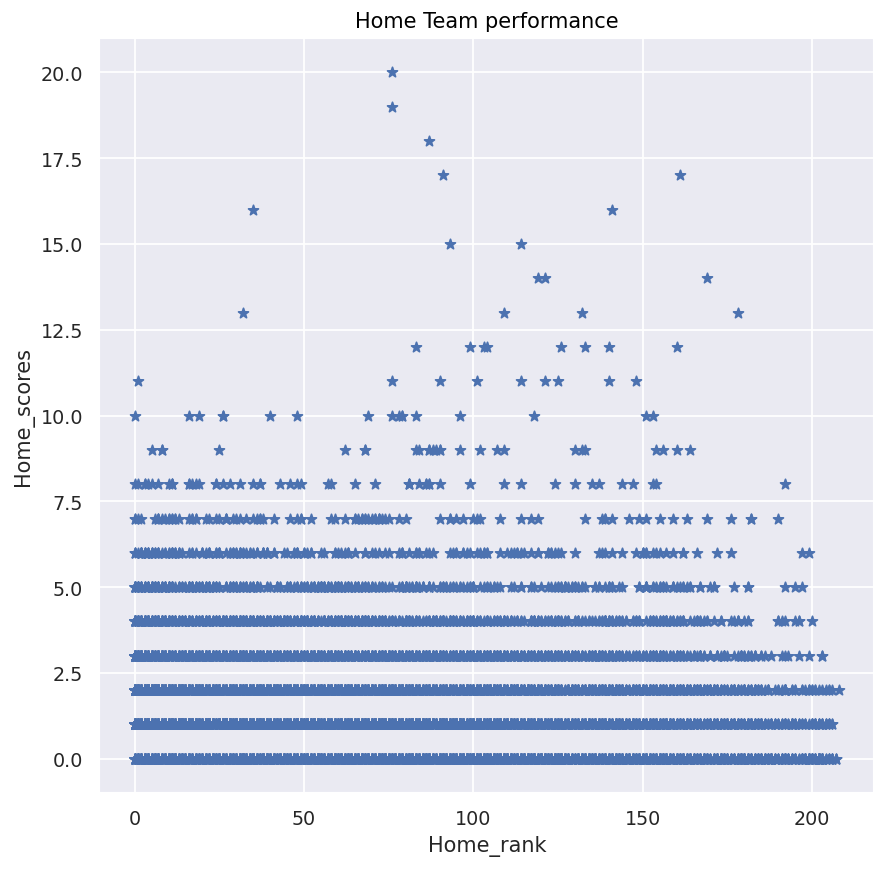

In [77]:
# Visualizing the dependent vs independent variable by plotting a scatter plot

sns.set(style = 'darkgrid')
plt.figure(figsize = (8,8), dpi = 125)
plt.scatter(X,y, marker = '*') 
plt.title('Home Team performance', color = 'black')
plt.xlabel('Home_rank')
plt.ylabel('Home_scores')
plt.show()


The chart above shows that there is no particular observable trend but,

There are more points on the lower side of the scatter plot.

Indicating in most cases the home team scores between 0 and 5 goals.

In [78]:
# Split the dataset into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

In [79]:
# Fit Linear Regression model to the dataset
# This is for comparing the linear regression model to the polynomial regression model)

reg_line = LinearRegression()
reg_line.fit(X, y)

LinearRegression()

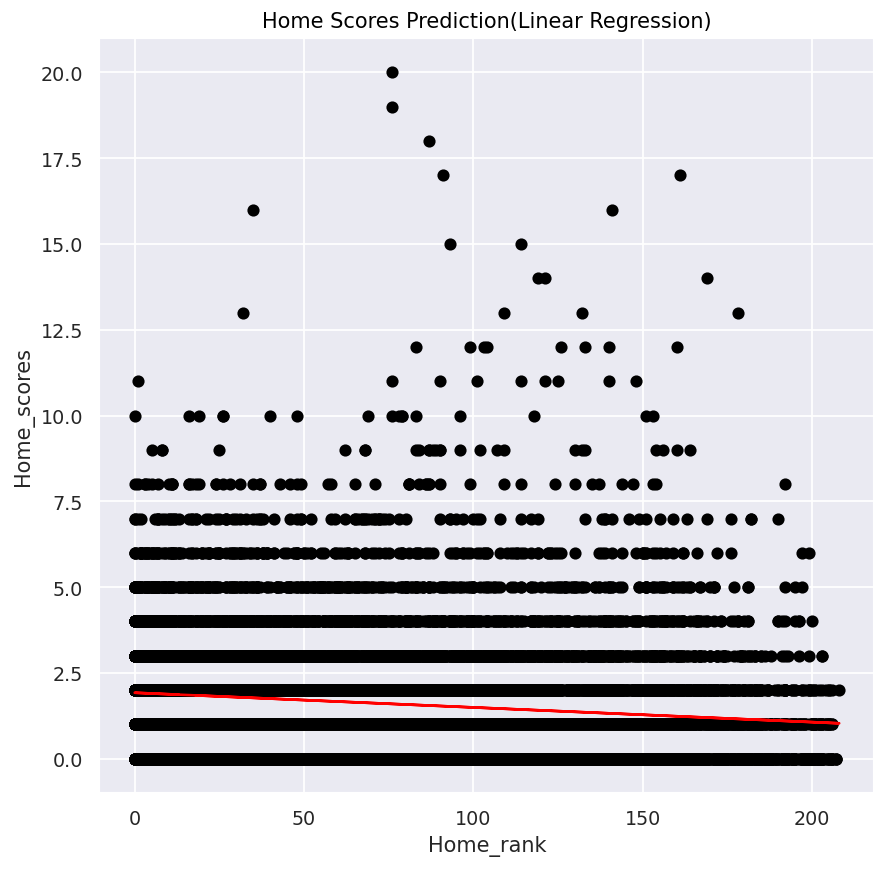

In [80]:
# Visualize the Linear Regression results

plt.figure(figsize = (8,8), dpi = 125)
plt.scatter(X, y, color='black')
plt.plot(X, reg_line.predict(X), color='red')
plt.title('Home Scores Prediction(Linear Regression)', color = 'black')
plt.xlabel('Home_rank')
plt.ylabel('Home_scores')
plt.show()

The home scores prediction chart above shows the line of best fit does not pass through a majority of the points.

This is also known as underfitting.

Therefore, the Linear regression model is not a good fit for this prediction.

We will fit a polynomial regression and evaluate the results.


In [81]:
# Fitting the polynomial features to the X the independent variable
# We will start  with a polynomial regression of degree 2

poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X)

In [82]:
# Fitting a polynomial Regression to the dataset.

pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

LinearRegression()

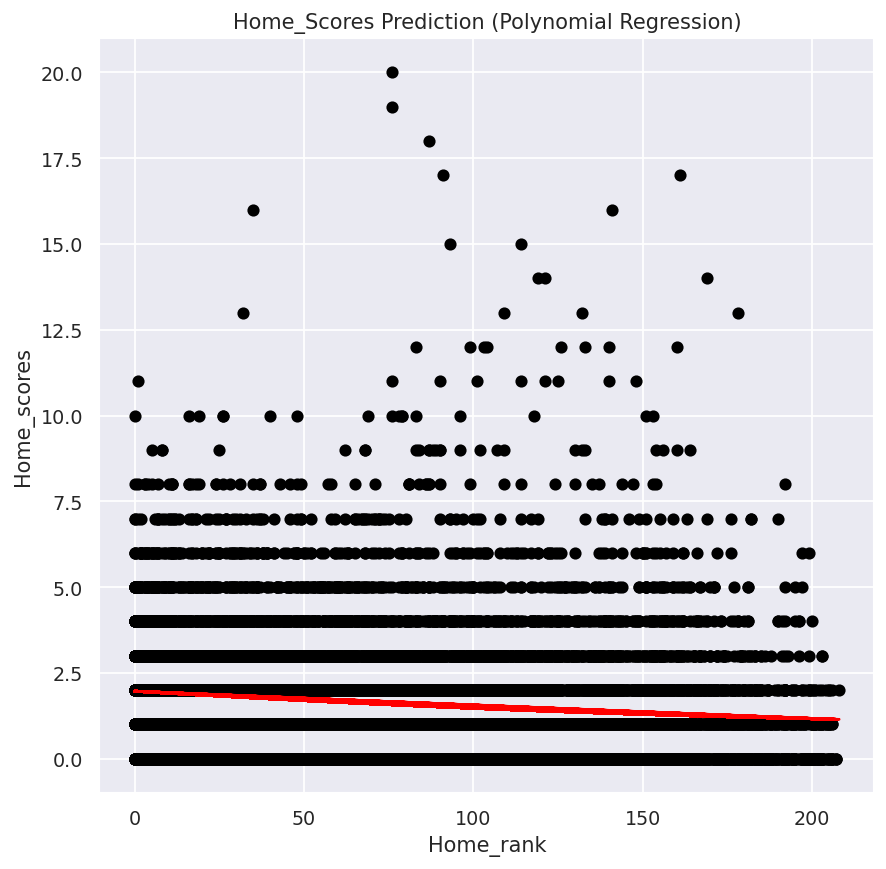

In [83]:
# Visualizing the polynomial Regression results

plt.figure(figsize = (8,8), dpi=125)
plt.scatter(X, y, color='black')
plt.plot(X, pol_reg.predict(X_poly), color='red')
plt.title('Home_Scores Prediction (Polynomial Regression)')
plt.xlabel('Home_rank')
plt.ylabel('Home_scores')
plt.show()


Using the polynomial regression model of degree 2,

it is still not easy to draw meaningful conclusion from it.

The curve is not passing through as many points as we'd want hence we can say that this graph is not fully optimized.

In [84]:
# Making predictions using our model

y_pred_poly = pol_reg.predict(X_poly)

In [85]:
# Evaluation our model

print('RMSE: ' , np.sqrt(mean_squared_error(y, y_pred_poly)))
print('r2_score: ' , r2_score(y, y_pred_poly))


RMSE:  1.5880578998328967
r2_score:  0.018694481014556508


Root Mean Square Error (RMSE), is the standard deviation of the residuals (predicted errors).

Residuals are a measure of how far from the regression line data points are;

It tells you how concentrated the data is around the line of best fit.

Root mean square error is commonly used in climatology, forecasting, and regression analysis to verify experimental results.

The lower the value the better.


In [86]:
# Mean of the actual scores

np.mean(y) 

1.6026635099141757

In [87]:
# Ten percent of the mean

1.6026635099141757 * 0.1

0.1602663509914176

* Comparing the RMSE score = 1.59 with the 10% of actual scores mean = 0.16, it is above the actual scores mean.

* This means that the model is not efficient to use for predicting the home team scores.

* Hence we should try a model with more degrees to improve its efficiency.



##### Model 2 

Predict how many goals the away team scores



In [88]:
# Model 2: Predict how many goals the away team scores given the away team rank

#
X = home_merged_encoded['away_rank'].values.reshape(-1, 1)

y = home_merged_encoded['away_score'].values.reshape(-1, 1)



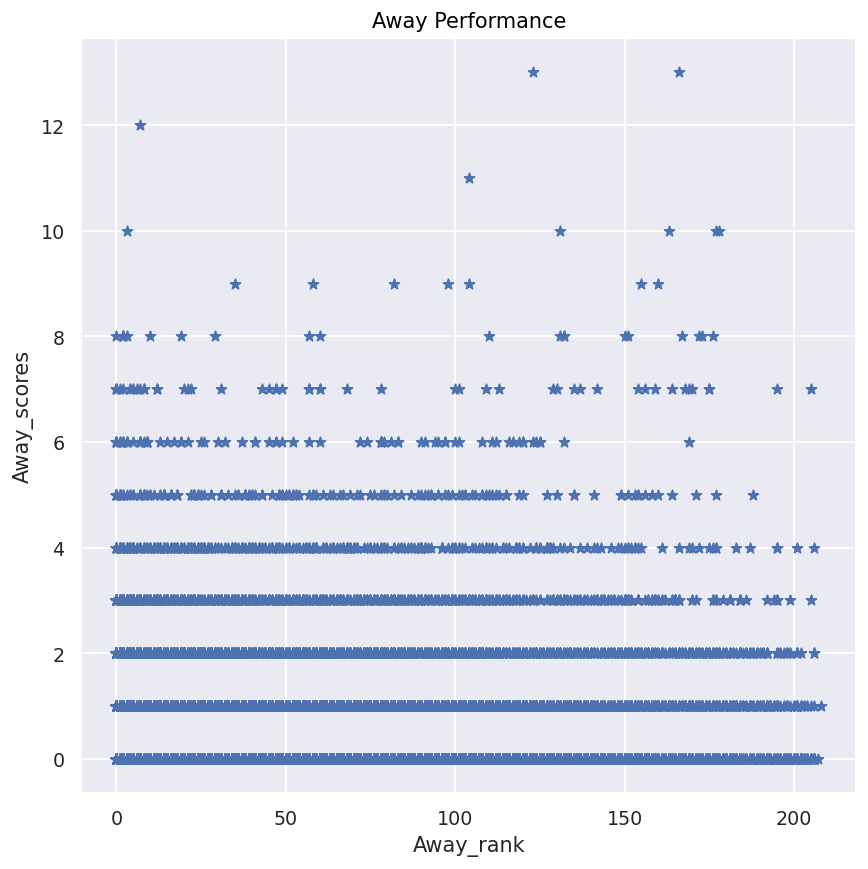

In [89]:
# Visualizing the dependent vs independent variable using a scatter plot

plt.figure(figsize = (8,8), dpi=125)
sns.set(style = 'darkgrid')
plt.scatter(X,y, marker = '*') 
plt.title('Away Performance', color = 'black')
plt.xlabel('Away_rank')
plt.ylabel('Away_scores')
plt.show()

# There is no particular observable trend but
# there are more points on the lower side of the scatter plot

The chart above shows that there is no particular observable trend but,

There are more points on the lower side of the scatter plot.

Indicating in most cases the away team scores between 0 and 4 goals.

In [90]:
## Split the dataset into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

In [91]:
# Fitting the polynomial features to the X

poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X)

In [92]:
# Fitting a polynomial Regression to the dataset

pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

LinearRegression()

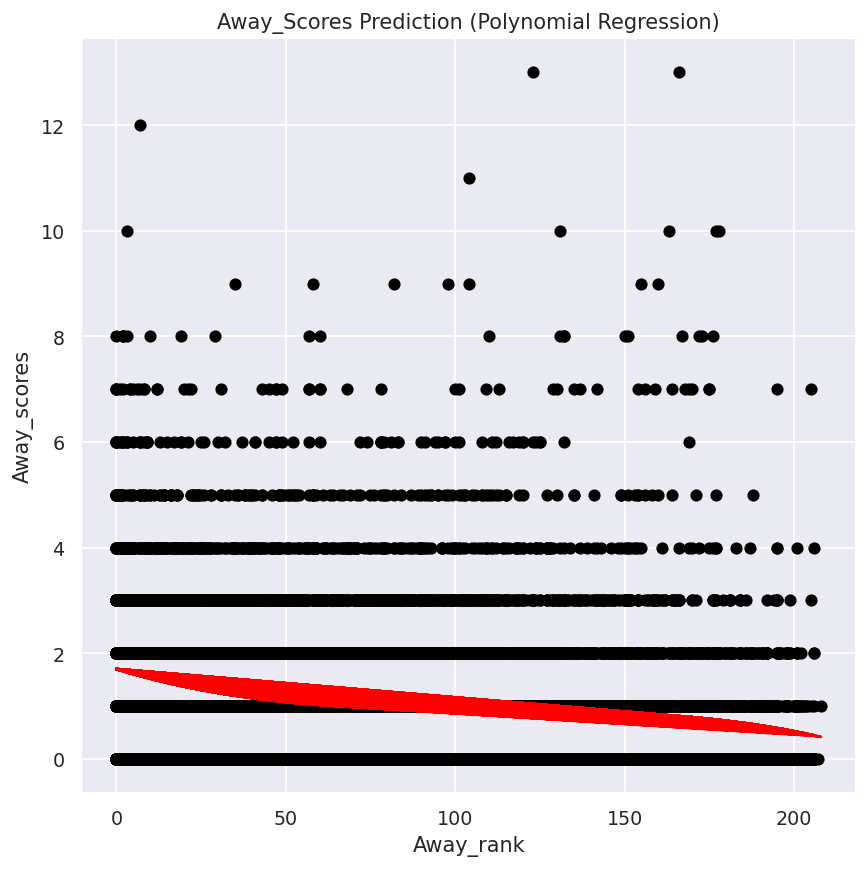

In [93]:
# Visualizing the polynomial Regression results using a scatter plot

plt.figure(figsize = (8,8), dpi=125)
plt.scatter(X, y, color='black')
plt.plot(X, pol_reg.predict(X_poly), color='red')
plt.title('Away_Scores Prediction (Polynomial Regression)')
plt.xlabel('Away_rank')
plt.ylabel('Away_scores')
plt.show()

Using the polynomial regression model of degree 3,

it is still not easy to draw meaningful conclusion from it.

The curve is not passing through as many points as we'd want hence we can say that this graph is not fully optimized.

This is underfitting.

The polynomial regression is not a good model to predict how many goals the away team scores given the away team rank.

In [94]:
# Making predictions using our model

y_pred_poly = pol_reg.predict(X_poly)

In [95]:
# Evaluating our model

print('RMSE: ' , np.sqrt(mean_squared_error(y, y_pred_poly)))
print('r2_score: ' , r2_score(y, y_pred_poly))


RMSE:  1.2165654223317743
r2_score:  0.04008131109627655


In [96]:
# Calculating the Mean of the actual scores 
# We will compare 10% of this mean with the RMSE

np.mean(y)

1.0687185557857355

Comparing the RMSE = 1.2 with 10% of the actual mean = 0.1

The RMSE is very high

Therefore this is not a good model to use for predicting the away score

### Approach 2: Logistic approach

#### Logistic Regression Model

- Logistic regression is a predictive analysis. 

- Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.
- Logistic Regression is used when the dependent variable(target) is categorical.
- In this model, we will be predicting whether the home team (Wins, Losses or Draws) in a match.


In [97]:
# Viewing before splittig our dataset

home_merged_encoded.head()

,home_score,away_score,neutral,Status_home,Status_Away,tournament_type,year,month,home_rank,away_rank
17910,0,0,0,0,0,1,0,7,18,66
17911,0,1,0,1,2,1,0,7,69,4
17912,0,0,0,0,0,1,0,7,21,34
17913,1,5,0,1,2,1,0,7,93,7
17914,0,0,1,0,0,1,0,7,57,24


In [98]:
# Splitting our dataset
# X: independent variables
# y: dependent variable

# Splitting the data into train and test sets

X = home_merged_encoded.drop(['Status_Away', 'Status_home', 'home_score', 'away_score'], axis = 1)
y = home_merged_encoded.Status_home


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=0)

In [99]:
# Fitting our model to our train sets
# Logistic Regression model in this case
# 

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression()

In [100]:
# Using our model to make a prediction

y_pred = LogReg.predict(X_test)

In [101]:
# Evalauting the model

# Getting the accuracy score of our model

print(accuracy_score(y_test, y_pred))

0.5839005622965374


The model can correctly predict if home team will (won, lost or drew) in a match with an accuracy of 58.8%

## 9 Cross-Validation (Logistic Regression Model)

In [102]:
# Using KFolds

# Splitting our dataset
# independet variables as X
# dependent variable as y

X = home_merged_encoded.drop(['Status_Away', 'Status_home', 'home_score', 'away_score'], axis = 1).values
y = home_merged_encoded.Status_home.values

# specifying the number of folds

folds = KFold(n_splits = 10)


# We now create and assess 10 models based on the folds we created.

RMSES = [] # An array of RMSEs to keep track of the RSME of each model
count = 1   # starting point # helps to keep track of the model number in training

for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))
  
  # Setting up the train and test based on the split determined by KFold
  # With 10 folds we split our data into training and test sets
  
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # fitting a Logistic regression model
  LogReg = LogisticRegression()  
  LogReg.fit(X_train, y_train)
  
  # Assess the accuracy of the model
  y_pred = LogReg.predict(X_test)
  
  # Calculating the RMSES of each model
  # Appending each RMSE into the list earlier created
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  
  # printing each model RMSE
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1
  
 


Training model 1
Model 1 Root Mean Squared Error: 0.890448992522325

Training model 2
Model 2 Root Mean Squared Error: 0.9348606832258056

Training model 3
Model 3 Root Mean Squared Error: 0.9370733743286807

Training model 4
Model 4 Root Mean Squared Error: 0.9601528477926108

Training model 5
Model 5 Root Mean Squared Error: 0.9275532489220222

Training model 6
Model 6 Root Mean Squared Error: 0.9275086794759693

Training model 7
Model 7 Root Mean Squared Error: 0.9865885748303547

Training model 8
Model 8 Root Mean Squared Error: 0.9542525802818357

Training model 9
Model 9 Root Mean Squared Error: 0.9717745452139983

Training model 10
Model 10 Root Mean Squared Error: 0.9964412698513031


In [103]:
# Printing the mean and the standard deviation of the RMSES in all the 10 models

print("The mean is: " + str(np.mean(RMSES)))
print("The standard deviation is: " + str(np.std(RMSES)))

The mean is: 0.9486654796444907
The standard deviation is: 0.030042198109440102


Since the standard deviation is low, the models are stable.
This is also visible in the plot below

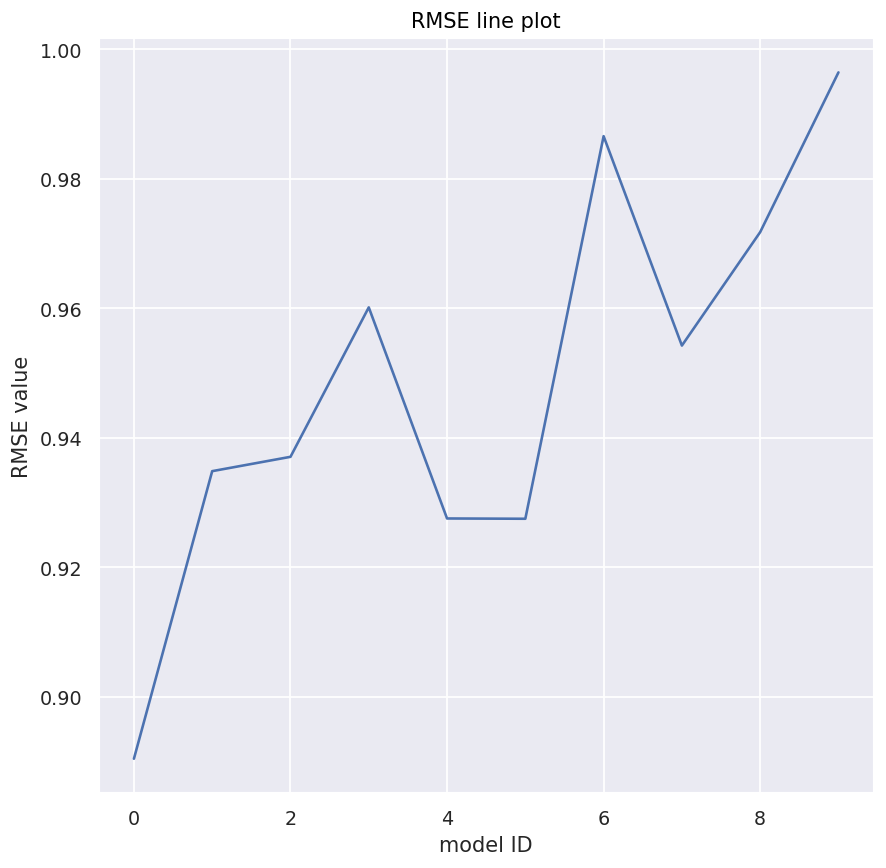

In [104]:
# Visualizing the 10-folds RMSES using a scatter plot

plt.figure(figsize = (8,8), dpi = 125)
plt.plot(RMSES)
plt.ylabel('RMSE value')
plt.title("RMSE line plot", color = 'Black')
plt.xlabel('model ID')
plt.show()

## 10 Heteroskedasticity

-Heteroscedasticity is the condition in which the variance of error term or the residual term in a regression model varies. 

-One of the assumptions of the linear regression states that the error term should have a constant variance; homoscedasticity.

-If this is violated, then we have heteroscedasticity.

     - Possible Reasons for heteroscedasticity
 
- Often occurs in those data sets which have a large range between the largest and the smallest observed values i.e. when there are outliers.

- When model is not correctly specified.

- If observations are mixed with different measures of scale.

- When incorrect transformation of data is used to perform the regression.

- Skewness in the distribution of a regressor, and may be some other sources.

    * Effects of heteroscedasticity

-As mentioned above that one of the assumptions of linear regression is that there is no heteroscedasticity. Breaking this assumption means that OLS (Ordinary Least Square) estimators are not the Best Linear Unbiased Estimator(BLUE) and their variance is not the lowest of all other unbiased estimators.

-Estimators are no longer best/efficient.

-The tests of hypothesis (like t-test, F-test) are no longer valid due to the inconsistency in the co-variance matrix of the estimated regression coefficients.



In [105]:
# Checking heteroskedasticity in the logistic model we created

In [106]:
# First: splitting our dataset 
# Into the feature set and the target variable

X = home_merged_encoded.drop(['Status_Away', 'Status_home', 'home_score', 'away_score'], axis = 1)
y = home_merged_encoded.Status_home

# Split the dataset into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

# Fitting a Logistic model

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

# Using our model to make a prediction

y_pred = LogReg.predict(X_test)

# We now create the residual by subtracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(y_pred, y_test)

# Creating a summary description of the residuals:

pd.DataFrame(residuals).describe()

residuals.mean()

0.41580349215744306

The mean is 0.43 indicating that we tend to be fairly correct, although slightly over estimating the home team perfomance by, on average, 43.8%



### Residual Plots

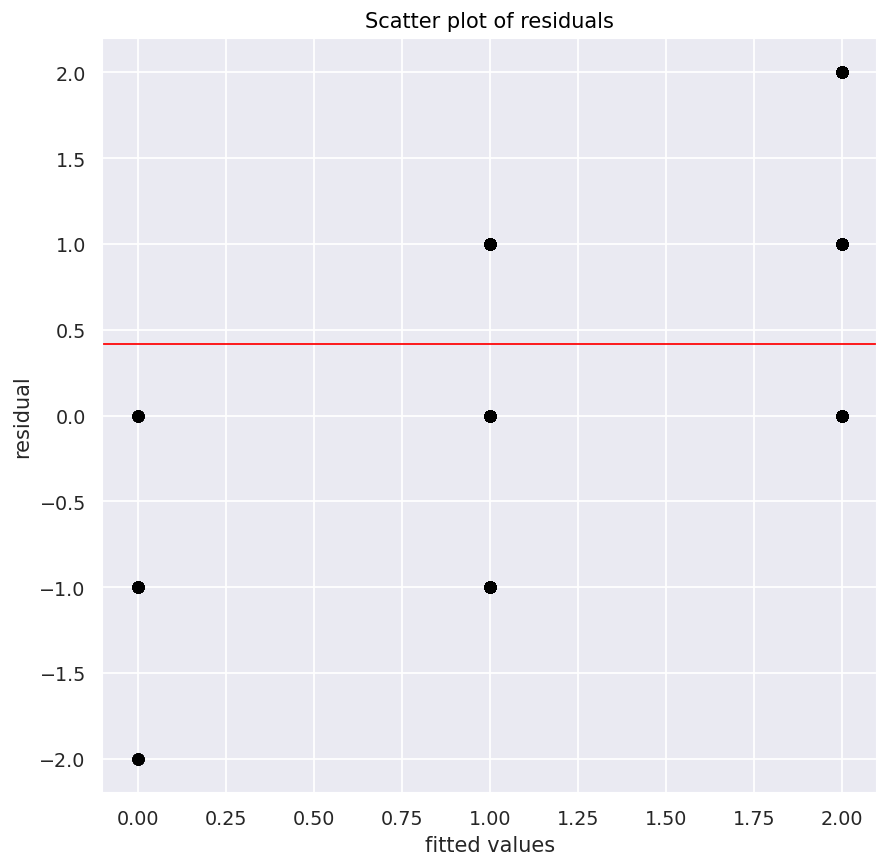

In [107]:
# Visualizing the residuals using a scatter plot

plt.figure(figsize = (8,8), dpi = 125)
plt.scatter(y_pred, residuals, color='black')
plt.title("Scatter plot of residuals", color = 'Black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

From the plot we can see that there is a constant variance.

Hence the homoscedasticity assumption is not violated.

We can confirm these using barletts test.


### Barlett's test

In [108]:
# Carrying out Barlett's test 
# It is a more thorough heteroskedasticity test.

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value


critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print("The p value is: " + str(p_value))

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('The variances are unequal, and the model should be reassessed')
else:
  print('The variances are Homogeneous!')

The p value is: 6.680655938722896e-211
The variances are Homogeneous!


## 11 Challenging the solution (Home and Away Scores Models)

In [109]:
# Using Hyperparameter Tuning

# Splitting the dataset into independent variables and target variable

X = home_merged_encoded.drop(['Status_Away', 'Status_home', 'home_score', 'away_score'], axis = 1)
y = home_merged_encoded.Status_home


In [110]:
# Creating the logistic Regression

logistic = LogisticRegression()


In [111]:
# Creating regularization penalty space    
#  penalty term is a constraint region or a budget 
# Regulization helps to select the preferred model complexity 
# so that the model is better at predicting

# L1: uses absolute values in the penalty function
# L2: minimizes the sum of errors

penalty = ['l1', 'l2']

# Creating regularization hyperparameter space

C = np.logspace(0, 4, 10)

# Creating hyperparameters options

hyperparameters = dict(C=C, penalty = penalty)

In [112]:
# Creating grid search using 10-fold cross validation

clf = GridSearchCV(logistic, hyperparameters, cv=10, verbose=0)

In [113]:
# Fitting grid search
best_model = clf.fit(X, y)

In [114]:
# Finding out the best hyperparameters available to tune the Logistic Regression model
best_model

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']})

In [116]:
# Viewing best hyperparameters

print('Best Penalty: ', best_model.best_estimator_.get_params()['penalty'])
print('Best C: ', best_model.best_estimator_.get_params()['C'])
print('Best model score: ' + str(best_model.best_score_))

Best Penalty:  l2
Best C:  1291.5496650148827
Best model score: 0.5783351375590752


In [117]:
# Predicting target vector

best_model.predict(X)

array([2, 1, 2, ..., 1, 1, 1])

In [118]:
# Using XGBOOST 

# Tunning the parameters

import xgboost as xgb

gbm = xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05).fit(X, y)

predictions = gbm.predict(X_test)

print(accuracy_score(y_test, predictions))


0.5945546019532406


## 12 Conclusion
 
 

1. Predicting whether home team wins, loses or draws in a match
 
* The best accuracy score using two hyperparameters is 58%
* Using XGboost algorithm the accuracy score was 59%
* Therefore, another algorithm can be considered to improve the accuracy score or more hyperparameters should be tuned 

2. Predicting the rank of a team
 
 * None of the three regularized regression models is a good fit to predict the rank; they all have RMSE scores greater than the mean of the actual.
 
 * Comparison: Elastic Net RMSE(21.84),  Lasso RMSE (19.93),  Ridge RMSE (21.31) against the actual mean (10.16)

* Since this is also more of a classification problem, using regressions is not the best approach though this project was restrictive.
